# DeepNovo V2 Paper recreation
This notebook will recreate the details of DeepNovo2

## Viewing the spectra- Pyteomics
The spectra are saved in Mascot Generic Format (mgf) which can be viewed using the python module ```pyteomics```. We can view and plot the data using this library

Set up the folder locations

In [79]:
from pathlib import Path
import os

BASE_FOLDER = Path(os.path.abspath('')).resolve().parent
DATA_FOLDER = BASE_FOLDER.joinpath('data')
CURRENT_FOLDER = BASE_FOLDER.joinpath('paper')
print(CURRENT_FOLDER)

/home/wesley/PycharmProjects/DeepNovoV2/paper


In [80]:
from pyteomics import mass, mgf, pylab_aux
import pylab

with mgf.read(str(DATA_FOLDER.joinpath('high.human.PXD004424/peaks.db.mgf'))) as spectra:
    spectrum = spectra[20]

print(f'Sequence: {spectrum["params"]["seq"]}\n'
      f'Charge: {spectrum["params"]["charge"]}\n'
      f'Mass: {spectrum["params"]["pepmass"][0]}\n'
      )

Sequence: GGGGGGYGSGGSSYGSGGGSYGSGGGGGGGR
Charge: 3+
Mass: 795.3203



We can calculate the mass of the sequence with mass

In [81]:
spectrum

{'params': {'title': 'C:\\Users\\xzhang\\PeaksProjects\\human_PXD004424_1_C:\\Users\\bsitest\\data.denovoseq\\human_PXD004424\\151009_exo3_1.raw_SCANS_5003',
  'pepmass': (795.3203, None),
  'charge': [3],
  'scans': 'F1:5003',
  'rtinseconds': 1238.298 second,
  'seq': 'GGGGGGYGSGGSSYGSGGGSYGSGGGGGGGR'},
 'm/z array': array([ 202.0833 ,  227.39635,  241.0932 ,  343.1338 ,  357.1021 ,
         436.919  ,  453.34665,  460.22754,  494.2317 ,  574.2682 ,
         661.30005,  672.52136,  718.32495,  881.37836,  942.07043,
         968.4149 , 1084.4252 , 1239.3219 , 1984.2572 ]),
 'intensity array': array([  607.16595,   610.4384 ,   954.298  ,   762.901  ,   672.7266 ,
          887.8304 ,   810.44617,   947.3322 ,  1007.8304 ,  3352.6567 ,
         1504.6437 ,  1022.91125, 13805.867  ,  4365.21   ,  1195.4666 ,
         1902.5406 ,  1361.9036 ,  1517.2942 ,  2034.5723 ]),
 'charge array': masked_array(data=[--, --, --, --, --, --, --, --, --, --, --, --, --, --,
                    --, --

In [82]:
sequence = spectrum["params"]["seq"]
print(sequence)
print(f'Mass if sequence is charged: {mass.calculate_mass(sequence, charge=3)}')
print(f'Uncharged sequence mass: {mass.calculate_mass(sequence)}')

GGGGGGYGSGGSSYGSGGGSYGSGGGGGGGR
Mass if sequence is charged: 795.3221330876166
Uncharged sequence mass: 2382.94456986254


We can view the spectrum with ```pylab```

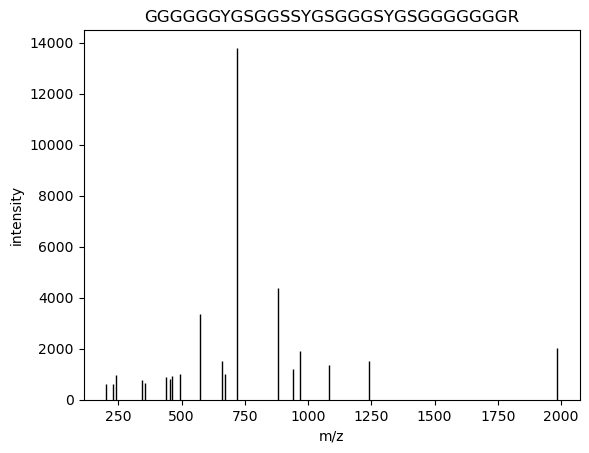

In [83]:
pylab.figure()
pylab_aux.plot_spectrum(spectrum, title=spectrum["params"]['seq'])
pylab.show()

We can annotate the plot with the b and y ions

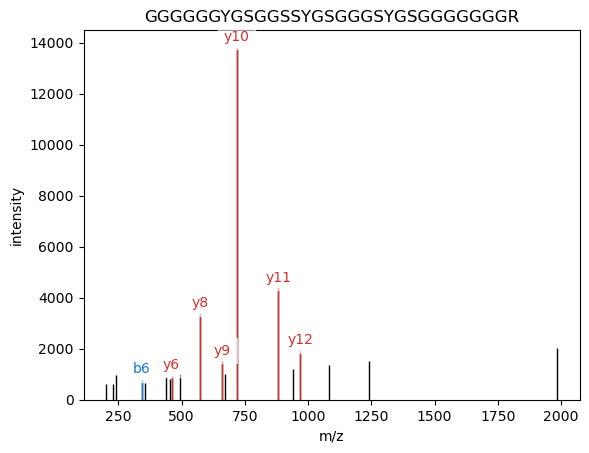

In [84]:
pylab_aux.annotate_spectrum(spectrum, peptide=sequence, title=sequence, maxcharge=3)
pylab.show()

We can view the m/z array and intensity arrays of the spectrum

In [160]:
mz_array  = list(spectrum["m/z array"])
intensity_array = list(spectrum["intensity array"])

In [161]:
print(f'The m/z array is: {mz_array}')

The m/z array is: [202.0833, 227.39635, 241.0932, 343.1338, 357.1021, 436.919, 453.34665, 460.22754, 494.2317, 574.2682, 661.30005, 672.52136, 718.32495, 881.37836, 942.07043, 968.4149, 1084.4252, 1239.3219, 1984.2572]


In [162]:
print(f'The intensity array is: {intensity_array}')

The intensity array is: [607.16595, 610.4384, 954.298, 762.901, 672.7266, 887.8304, 810.44617, 947.3322, 1007.8304, 3352.6567, 1504.6437, 1022.91125, 13805.867, 4365.21, 1195.4666, 1902.5406, 1361.9036, 1517.2942, 2034.5723]


## Feature Extraction
At iteration the theoretical location for each of the 26 tokens and ion pair is calculated.

In [88]:
import re
spectrum_location_dict = {}
line = True
with open(str(DATA_FOLDER.joinpath('cross.9high_80k.exclude_human/cross.cat.mgf.test.repeat')), 'r') as f:
    while line:
        current_location = f.tell()
        line = f.readline()
        if "BEGIN IONS" in line:
            spectrum_location = current_location
        elif "SCANS=" in line:
            scan = re.split('[=\r\n]', line)[1]
            spectrum_location_dict[scan] = spectrum_location
spectrum_location_dict

{'F1:2424': 0,
 'F1:2488': 917,
 'F1:2888': 3088,
 'F1:3583': 4712,
 'F1:3697': 5667,
 'F1:3861': 6779,
 'F1:3903': 8835,
 'F1:4277': 10317,
 'F1:4316': 11711,
 'F1:4472': 12979,
 'F1:4794': 15881,
 'F1:4918': 18489,
 'F1:5203': 20989,
 'F1:5261': 23247,
 'F1:5274': 25026,
 'F1:5430': 26991,
 'F1:5441': 29057,
 'F1:5620': 30968,
 'F1:5723': 33134,
 'F1:5792': 36506,
 'F1:5810': 39177,
 'F1:5837': 42191,
 'F1:5904': 45279,
 'F1:5948': 47827,
 'F1:6080': 49535,
 'F1:6083': 52249,
 'F1:6105': 56123,
 'F1:6460': 58197,
 'F1:6556': 59597,
 'F1:6575': 61900,
 'F1:6706': 64618,
 'F1:6751': 68171,
 'F1:6760': 71352,
 'F1:6772': 75283,
 'F1:6833': 78750,
 'F1:6914': 81342,
 'F1:7062': 84541,
 'F1:7064': 87734,
 'F1:7091': 90554,
 'F1:7256': 92538,
 'F1:7260': 95836,
 'F1:7271': 99405,
 'F1:7283': 103201,
 'F1:7420': 105334,
 'F1:7427': 108721,
 'F1:7495': 112132,
 'F1:7992': 114752,
 'F1:8158': 118972,
 'F1:8190': 122138,
 'F1:8241': 123961,
 'F1:8320': 126476,
 'F1:8403': 130423,
 'F1:8427': 1

In [89]:
input_spectrum_handle = open(str(DATA_FOLDER.joinpath('cross.9high_80k.exclude_human/cross.cat.mgf.test.repeat')), 'r')


In [90]:
# Special vocabulary symbols - we always put them at the start.
_PAD = "_PAD"
_GO = "_GO"
_EOS = "_EOS"
_START_VOCAB = [_PAD, _GO, _EOS]

PAD_ID = 0
GO_ID = 1
EOS_ID = 2
assert PAD_ID == 0
vocab_reverse = ['A',
                 'R',
                 'N',
                 'N(Deamidation)',
                 'D',
                 #~ 'C',
                 'C(Carbamidomethylation)',
                 'E',
                 'Q',
                 'Q(Deamidation)',
                 'G',
                 'H',
                 'I',
                 'L',
                 'K',
                 'M',
                 'M(Oxidation)',
                 'F',
                 'P',
                 'S',
                 'T',
                 'W',
                 'Y',
                 'V',
                ]

In [91]:
vocab_reverse = _START_VOCAB + vocab_reverse
print("vocab_reverse ", vocab_reverse)

vocab_reverse  ['_PAD', '_GO', '_EOS', 'A', 'R', 'N', 'N(Deamidation)', 'D', 'C(Carbamidomethylation)', 'E', 'Q', 'Q(Deamidation)', 'G', 'H', 'I', 'L', 'K', 'M', 'M(Oxidation)', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']


In [92]:
vocab = dict([(x, y) for (y, x) in enumerate(vocab_reverse)])
print("vocab ", vocab)

vocab  {'_PAD': 0, '_GO': 1, '_EOS': 2, 'A': 3, 'R': 4, 'N': 5, 'N(Deamidation)': 6, 'D': 7, 'C(Carbamidomethylation)': 8, 'E': 9, 'Q': 10, 'Q(Deamidation)': 11, 'G': 12, 'H': 13, 'I': 14, 'L': 15, 'K': 16, 'M': 17, 'M(Oxidation)': 18, 'F': 19, 'P': 20, 'S': 21, 'T': 22, 'W': 23, 'Y': 24, 'V': 25}


In [93]:
vocab_size = len(vocab_reverse)
print("vocab_size ", vocab_size)

vocab_size  26


In [94]:
# ==============================================================================
# GLOBAL VARIABLES for THEORETICAL MASS
# ==============================================================================
mass_H = 1.0078
mass_H2O = 18.0106
mass_NH3 = 17.0265
mass_N_terminus = 1.0078
mass_C_terminus = 17.0027
mass_CO = 27.9949

In [95]:
mass_AA = {'_PAD': 0.0,
           '_GO': mass_N_terminus-mass_H,
           '_EOS': mass_C_terminus+mass_H,
           'A': 71.03711, # 0
           'R': 156.10111, # 1
           'N': 114.04293, # 2
           'N(Deamidation)': 115.02695,
           'D': 115.02694, # 3
           #~ 'C(Carbamidomethylation)': 103.00919, # 4
           'C(Carbamidomethylation)': 160.03065, # C(+57.02)
           #~ 'C(Carbamidomethylation)': 161.01919, # C(+58.01) # orbi
           'E': 129.04259, # 5
           'Q': 128.05858, # 6
           'Q(Deamidation)': 129.0426,
           'G': 57.02146, # 7
           'H': 137.05891, # 8
           'I': 113.08406, # 9
           'L': 113.08406, # 10
           'K': 128.09496, # 11
           'M': 131.04049, # 12
           'M(Oxidation)': 147.0354,
           'F': 147.06841, # 13
           'P': 97.05276, # 14
           'S': 87.03203, # 15
           'T': 101.04768, # 16
           'W': 186.07931, # 17
           'Y': 163.06333, # 18
           'V': 99.06841, # 19
          }

In [96]:
mass_AA

{'_PAD': 0.0,
 '_GO': 0.0,
 '_EOS': 18.0105,
 'A': 71.03711,
 'R': 156.10111,
 'N': 114.04293,
 'N(Deamidation)': 115.02695,
 'D': 115.02694,
 'C(Carbamidomethylation)': 160.03065,
 'E': 129.04259,
 'Q': 128.05858,
 'Q(Deamidation)': 129.0426,
 'G': 57.02146,
 'H': 137.05891,
 'I': 113.08406,
 'L': 113.08406,
 'K': 128.09496,
 'M': 131.04049,
 'M(Oxidation)': 147.0354,
 'F': 147.06841,
 'P': 97.05276,
 'S': 87.03203,
 'T': 101.04768,
 'W': 186.07931,
 'Y': 163.06333,
 'V': 99.06841}

In [97]:
import numpy as np
mass_ID = [mass_AA[vocab_reverse[x]] for x in range(vocab_size)]
mass_ID_np = np.array(mass_ID, dtype=np.float32)

In [98]:
mass_ID_np

array([  0.     ,   0.     ,  18.0105 ,  71.03711, 156.1011 , 114.04293,
       115.02695, 115.02694, 160.03065, 129.04259, 128.05858, 129.0426 ,
        57.02146, 137.05891, 113.08406, 113.08406, 128.09496, 131.0405 ,
       147.0354 , 147.0684 ,  97.05276,  87.03203, 101.04768, 186.07932,
       163.06332,  99.06841], dtype=float32)

In [99]:
mass_AA_min = mass_AA["G"] # 57.02146
mass_AA_min

57.02146

In [100]:
mass_AA_min + mass_AA['Q'] + mass_AA['T']

286.12772

In [101]:
peptide_id_list = [vocab[x] for x in sequence[0:3]]
peptide_id_list

[12, 12, 12]

In [102]:
forward_id_input = [GO_ID] + peptide_id_list
forward_id_input

[1, 12, 12, 12]

In [103]:
forward_id_target = peptide_id_list + [EOS_ID]
forward_id_input

[1, 12, 12, 12]

In [104]:
forward_ion_location_index_list = []
prefix_mass = 0

for i, id in enumerate(forward_id_input):
    prefix_mass += mass_ID[id]

prefix_mass

171.06438

In [105]:
prefix_mass + mass_ID_np

array([171.06438, 171.06438, 189.07487, 242.10149, 327.16547, 285.1073 ,
       286.0913 , 286.0913 , 331.09503, 300.10696, 299.12296, 300.107  ,
       228.08585, 308.1233 , 284.14844, 284.14844, 299.15933, 302.10486,
       318.0998 , 318.13278, 268.11713, 258.0964 , 272.11206, 357.14368,
       334.1277 , 270.13278], dtype=float32)

In [106]:
# ==============================================================================
# GLOBAL VARIABLES for PRECISION, RESOLUTION, temp-Limits of MASS & LEN
# ==============================================================================


# if change, need to re-compile cython_speedup << NO NEED
#~ SPECTRUM_RESOLUTION = 10 # bins for 1.0 Da = precision 0.1 Da
#~ SPECTRUM_RESOLUTION = 20 # bins for 1.0 Da = precision 0.05 Da
#~ SPECTRUM_RESOLUTION = 40 # bins for 1.0 Da = precision 0.025 Da

WINDOW_SIZE = 10
print("WINDOW_SIZE", WINDOW_SIZE)

MZ_MAX = 3000.0
MAX_NUM_PEAK = 500

sinusoid_base = 30000.
spectrum_reso = 10
n_position = int(MZ_MAX) * spectrum_reso

WINDOW_SIZE 10


In [107]:
# ==============================================================================
# HYPER-PARAMETERS of the NEURAL NETWORKS
# ==============================================================================
embedding_size = 512
print("embedding_size ", embedding_size)

embedding_size  512


In [108]:
def get_ion_index(peptide_mass, prefix_mass, direction):
    """
    peptide_mass: neutral mass of a peptide
    prefix_mass:
    direction: 0 for forward, 1 for backward

    return:
    A int32 ndarry of shape [26,8], each element represents an index of the spectrum embedding matrix of bound position, the index is 0
    """
    if direction == 0:
        candidate_b_mass = prefix_mass + mass_ID_np
        candidate_y_mass = peptide_mass - candidate_b_mass
    elif direction == 1:
        candidate_y_mass = prefix_mass + mass_ID_np
        candidate_b_mass = peptide_mass - candidate_y_mass

    candidate_a_mass = candidate_b_mass - mass_CO

    # b-ions
    candidate_b_H2O = candidate_b_mass - mass_H2O
    candidate_b_NH3 = candidate_b_mass - mass_NH3

    candidate_b_plus2_charge1 = ((candidate_b_mass + 2 * mass_H) / 2 - mass_H)

    # a-ions
    candidate_a_H2O = candidate_a_mass - mass_H2O
    candidate_a_NH3 = candidate_a_mass - mass_NH3
    candidate_a_plus2_charge1 = ((candidate_a_mass + 2 * mass_H) / 2 - mass_H)

    # y-ions
    candidate_y_H2O = candidate_y_mass - mass_H2O
    candidate_y_NH3 = candidate_y_mass - mass_NH3
    candidate_y_plus2_charge1 = ((candidate_y_mass + 2 * mass_H) / 2 - mass_H)

    # 8 ions
    b_ions = [candidate_b_mass,
              candidate_b_H2O,
              candidate_b_NH3,
              candidate_b_plus2_charge1]

    y_ions = [candidate_y_mass,
              candidate_y_H2O,
              candidate_y_NH3,
              candidate_y_plus2_charge1]

    a_ions = [candidate_a_mass,
              candidate_a_H2O,
              candidate_a_NH3,
              candidate_a_plus2_charge1]

    ion_mass_list = b_ions + y_ions + a_ions
    ion_mass = np.array(ion_mass_list, dtype=np.float32)

    in_bound_mask = np.logical_and(ion_mass > 0,
                                   ion_mass <= MZ_MAX).astype(np.float32)

    ion_location = ion_mass * in_bound_mask
    return ion_location.transpose()

In [109]:
peptide_mass = mass.calculate_mass(sequence)
peptide_mass

2382.94456986254

In [110]:
get_ion_index(peptide_mass, prefix_mass, 0)

array([[ 171.06438 ,  153.05377 ,  154.03787 ,   85.53219 , 2211.8801  ,
        2193.8696  , 2194.8535  , 1105.9401  ,  143.06947 ,  125.058876,
         126.04297 ,   71.53474 ],
       [ 171.06438 ,  153.05377 ,  154.03787 ,   85.53219 , 2211.8801  ,
        2193.8696  , 2194.8535  , 1105.9401  ,  143.06947 ,  125.058876,
         126.04297 ,   71.53474 ],
       [ 189.07487 ,  171.06427 ,  172.04837 ,   94.53744 , 2193.8696  ,
        2175.8591  , 2176.843   , 1096.9348  ,  161.07997 ,  143.06937 ,
         144.05347 ,   80.539986],
       [ 242.10149 ,  224.09088 ,  225.07498 ,  121.05074 , 2140.843   ,
        2122.8325  , 2123.8164  , 1070.4215  ,  214.10658 ,  196.09598 ,
         197.08008 ,  107.05329 ],
       [ 327.16547 ,  309.15488 ,  310.13898 ,  163.58273 , 2055.779   ,
        2037.7684  , 2038.7526  , 1027.8895  ,  299.17056 ,  281.15997 ,
         282.14407 ,  149.58528 ],
       [ 285.1073  ,  267.0967  ,  268.0808  ,  142.55365 , 2097.8374  ,
        2079.827   , 2

In [111]:
forward_ion_location_index_list = []
prefix_mass = 0

for i, id in enumerate(forward_id_input):
    prefix_mass += mass_ID[id]
    ion_location = get_ion_index(peptide_mass, prefix_mass, 0)
    forward_ion_location_index_list.append(ion_location)

forward_ion_location_index_list

[array([[ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  2.38294458e+03,  2.36493408e+03,
          2.36591797e+03,  1.19147229e+03, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
          0.00000000e+00,  2.38294458e+03,  2.36493408e+03,
          2.36591797e+03,  1.19147229e+03, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 1.80105000e+01, -0.00000000e+00,  9.83999252e-01,
          9.00524998e+00,  2.36493408e+03,  2.34692358e+03,
          2.34790747e+03,  1.18246704e+03, -0.00000000e+00,
         -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
        [ 7.10371094e+01,  5.30265121e+01,  5.40106087e+01,
          3.55185547e+01,  2.31190747e+03,  2.29389697e+03,
          2.29488086e+03,  1.15595374e+03,  4.30422096e+01,
          2.50316105e+01,  2.60157089e+01,  2.15211048e+01],
        [ 1.56101105e+02,  1.3809050

In [112]:
backward_id_input = [EOS_ID] + peptide_id_list[::-1]
backward_id_target = peptide_id_list[::-1] + [GO_ID]
backward_ion_location_index_list = []
suffix_mass = 0

for i, id in enumerate(backward_id_input):
    suffix_mass += mass_ID[id]
    ion_location = get_ion_index(peptide_mass, suffix_mass, 1)
    backward_ion_location_index_list.append(ion_location)

backward_ion_location_index_list



[array([[ 2.36493408e+03,  2.34692358e+03,  2.34790747e+03,
          1.18246704e+03,  1.80105000e+01, -0.00000000e+00,
          9.83999252e-01,  9.00524998e+00,  2.33693921e+03,
          2.31892871e+03,  2.31991260e+03,  1.16846960e+03],
        [ 2.36493408e+03,  2.34692358e+03,  2.34790747e+03,
          1.18246704e+03,  1.80105000e+01, -0.00000000e+00,
          9.83999252e-01,  9.00524998e+00,  2.33693921e+03,
          2.31892871e+03,  2.31991260e+03,  1.16846960e+03],
        [ 2.34692358e+03,  2.32891309e+03,  2.32989697e+03,
          1.17346179e+03,  3.60209999e+01,  1.80104008e+01,
          1.89944992e+01,  1.80105000e+01,  2.31892871e+03,
          2.30091821e+03,  2.30190210e+03,  1.15946436e+03],
        [ 2.29389697e+03,  2.27588647e+03,  2.27687036e+03,
          1.14694849e+03,  8.90476074e+01,  7.10370102e+01,
          7.20211029e+01,  4.45238037e+01,  2.26590210e+03,
          2.24789160e+03,  2.24887549e+03,  1.13295105e+03],
        [ 2.20883301e+03,  2.1908225

In [113]:
backward_id_input = [EOS_ID] + peptide_id_list[::-1]
backward_id_input

[2, 12, 12, 12]

In [114]:

for i, id in enumerate(backward_id_input):
    suffix_mass += mass_ID[id]
    ion_location = get_ion_index(peptide_mass, suffix_mass, 1)
    print(ion_location)


[[2175.8591   2157.8486   2158.8325   1087.9296    207.08537   189.07477
   190.05887   103.54269  2147.8643   2129.8538   2130.8376   1073.9321  ]
 [2175.8591   2157.8486   2158.8325   1087.9296    207.08537   189.07477
   190.05887   103.54269  2147.8643   2129.8538   2130.8376   1073.9321  ]
 [2157.8486   2139.8381   2140.822    1078.9243    225.09587   207.08527
   208.06937   112.547935 2129.8538   2111.8433   2112.8271   1064.9269  ]
 [2104.822    2086.8115   2087.7954   1052.411     278.1225    260.1119
   261.096     139.06125  2076.8271   2058.8167   2059.8005   1038.4136  ]
 [2019.758    2001.7474   2002.7316   1009.879     363.18646   345.17587
   346.15997   181.59323  1991.7632   1973.7526   1974.7367    995.8816  ]
 [2061.8164   2043.8058   2044.7899   1030.9082    321.1283    303.1177
   304.1018    160.56415  2033.8215   2015.8109   2016.795    1016.91077 ]
 [2060.8323   2042.8217   2043.8058   1030.4161    322.1123    304.1017
   305.08582   161.05615  2032.8374   2014

In [115]:
get_ion_index(peptide_mass, suffix_mass, 1)

array([[2004.7948 , 1986.7842 , 1987.7683 , 1002.3974 ,  378.14975,
         360.13916,  361.12326,  189.07487, 1976.7999 , 1958.7893 ,
        1959.7734 ,  988.39996],
       [2004.7948 , 1986.7842 , 1987.7683 , 1002.3974 ,  378.14975,
         360.13916,  361.12326,  189.07487, 1976.7999 , 1958.7893 ,
        1959.7734 ,  988.39996],
       [1986.7843 , 1968.7737 , 1969.7578 ,  993.39215,  396.16025,
         378.14966,  379.13376,  198.08012, 1958.7894 , 1940.7788 ,
        1941.763  ,  979.3947 ],
       [1933.7577 , 1915.7471 , 1916.7312 ,  966.87885,  449.18686,
         431.17627,  432.16037,  224.59343, 1905.7628 , 1887.7522 ,
        1888.7363 ,  952.8814 ],
       [1848.6937 , 1830.6831 , 1831.6672 ,  924.34686,  534.25085,
         516.24023,  517.22437,  267.12543, 1820.6989 , 1802.6882 ,
        1803.6724 ,  910.3494 ],
       [1890.752  , 1872.7413 , 1873.7255 ,  945.376  ,  492.1927 ,
         474.1821 ,  475.1662 ,  246.09634, 1862.7571 , 1844.7465 ,
        1845.7306 ,

I need to look at why we are getting 12 columns and not 8

In [116]:
def pad_to_length(data: list, length, pad_token=0.):
  """
  pad data to length if len(data) is smaller than length
  :param data:
  :param length:
  :param pad_token:
  :return:
  """
  for i in range(length - len(data)):
    data.append(pad_token)

In [117]:
def get_sinusoid_encoding_table(n_position, embed_size, padding_idx=0):
    def cal_angle(position, hid_idx):
        return position / np.power(sinusoid_base,2 * (hid_idx//2) / embed_size)

    def get_posi_angle_vec(position):
        return [cal_angle(position, hid_j) for hid_j in range(embed_size)]


    sinusoid_matrix = np.array([get_posi_angle_vec(pos_i) for pos_i in range(n_position + 1)], dtype=np.float32)

    sinusoid_matrix[:, 0::2] = np.sin(sinusoid_matrix[:, 0::2]) # dim 2i
    sinusoid_matrix[:, 1::2] = np.cos(sinusoid_matrix[:, 1::2]) # dim 2i + 1

    sinusoid_matrix[padding_idx]=0

    return sinusoid_matrix

In [118]:
sinusoid_matrix = get_sinusoid_encoding_table(n_position, embedding_size, padding_idx=PAD_ID)

In [158]:
mz_array

[202.0833,
 227.39635,
 241.0932,
 343.1338,
 357.1021,
 436.919,
 453.34665,
 460.22754,
 494.2317,
 574.2682,
 661.30005,
 672.52136,
 718.32495,
 881.37836,
 942.07043,
 968.4149,
 1084.4252,
 1239.3219,
 1984.2572,
 2383.95236986254,
 1.0078,
 2365.94186986254,
 19.0183,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [163]:
def process_peaks(spectrum_mz_list, spectrum_intensity_list, peptide_mass):
    charge = 1.0
    spectrum_intensity_max = np.max(spectrum_intensity_list)
    print(f'Spectrum intensity maz {spectrum_intensity_max}')

    # charge 1 peptide ion_location
    spectrum_mz_list.append(peptide_mass + charge*mass_H)
    print(spectrum_mz_list)
    spectrum_intensity_list.append(spectrum_intensity_max)
    print(spectrum_intensity_list)

    # N-terminal, b-ion, peptide_mass_C
    # append N-terminal
    mass_N = mass_N_terminus - mass_H
    spectrum_mz_list.append(mass_N + charge*mass_H)
    spectrum_intensity_list.append(spectrum_intensity_max)
    print(spectrum_mz_list)
    print(spectrum_intensity_list)

    # append peptide_mass_C
    mass_C = mass_C_terminus + mass_H
    peptide_mass_C = peptide_mass - mass_C
    spectrum_mz_list.append(peptide_mass_C + charge*mass_H)
    spectrum_intensity_list.append(spectrum_intensity_max)

    # C-terminal, y-ion, peptide_mass_N
    # append C-terminal

    mass_C = mass_C_terminus + mass_H
    spectrum_mz_list.append(mass_C + charge*mass_H)
    spectrum_intensity_list.append(spectrum_intensity_max)

    pad_to_length(mz_array, MAX_NUM_PEAK)
    pad_to_length(spectrum_mz_list, MAX_NUM_PEAK)

    spectrum_mz = np.array(spectrum_mz_list, dtype=np.float32)
    spectrum_mz_location = np.ceil(spectrum_mz * spectrum_reso).astype(np.int32)

    neutral_mass = spectrum_mz - charge*mass_H

    in_bound_mask = np.logical_and(neutral_mass > 0, neutral_mass < MZ_MAX)
    neutral_mass[~in_bound_mask] = 0

    # Intensity
    spectrum_intensity = np.array(spectrum_intensity_list, dtype=np.float32)
    norm_intensity = spectrum_intensity / spectrum_intensity_max

    spectrum_representation = np.zeros(embedding_size, dtype=np.float32)



    for i, loc in enumerate(spectrum_mz_location):
        if loc < 0.5 or loc > n_position:
            continue
        else:
            spectrum_representation += sinusoid_matrix[loc] * norm_intensity[i]

    top_N_indices = np.argpartition(norm_intensity, -MAX_NUM_PEAK)[MAX_NUM_PEAK:]



    intensity = norm_intensity[top_N_indices]


    mass_location = neutral_mass[top_N_indices]


    return mass_location, intensity, spectrum_representation





In [164]:
peak_location, peak_intensity, spectrum_representation = process_peaks(mz_array, intensity_array, peptide_mass)

Spectrum intensity maz 13805.867
[202.0833, 227.39635, 241.0932, 343.1338, 357.1021, 436.919, 453.34665, 460.22754, 494.2317, 574.2682, 661.30005, 672.52136, 718.32495, 881.37836, 942.07043, 968.4149, 1084.4252, 1239.3219, 1984.2572, 2383.95236986254]
[607.16595, 610.4384, 954.298, 762.901, 672.7266, 887.8304, 810.44617, 947.3322, 1007.8304, 3352.6567, 1504.6437, 1022.91125, 13805.867, 4365.21, 1195.4666, 1902.5406, 1361.9036, 1517.2942, 2034.5723, 13805.867]
[202.0833, 227.39635, 241.0932, 343.1338, 357.1021, 436.919, 453.34665, 460.22754, 494.2317, 574.2682, 661.30005, 672.52136, 718.32495, 881.37836, 942.07043, 968.4149, 1084.4252, 1239.3219, 1984.2572, 2383.95236986254, 1.0078]
[607.16595, 610.4384, 954.298, 762.901, 672.7266, 887.8304, 810.44617, 947.3322, 1007.8304, 3352.6567, 1504.6437, 1022.91125, 13805.867, 4365.21, 1195.4666, 1902.5406, 1361.9036, 1517.2942, 2034.5723, 13805.867, 13805.867]


ValueError: kth(=-477) out of bounds (23)

In [165]:
spectrum_representation

array([ 3.42656851e-01, -2.41225100e+00,  8.74911487e-01, -2.00467736e-01,
       -5.37643731e-01,  7.33569741e-01,  1.04606974e+00,  4.67338622e-01,
        6.97660923e-01, -1.71327472e-01, -7.61005402e-01,  1.17125344e+00,
       -7.83013046e-01,  6.05268598e-01,  1.04363549e+00, -1.21146262e+00,
        2.47971296e+00, -1.36026621e+00, -8.32190514e-01,  1.61063981e+00,
        2.74566746e+00, -2.03426719e+00,  1.55300438e+00,  4.15493906e-01,
        7.65941501e-01,  3.86790574e-01, -4.45390604e-02,  2.76863670e+00,
        9.37271714e-01,  1.60175943e+00, -7.99112678e-01,  1.48502147e+00,
        9.03393626e-01,  3.42977047e+00, -3.22329462e-01, -8.28855157e-01,
       -3.32558632e+00,  2.51347446e+00,  6.25382304e-01,  2.02135801e+00,
       -3.16347313e+00,  5.33031464e-01, -2.71633554e+00,  3.71678710e-01,
       -1.35936093e+00, -3.81292129e+00, -2.19200683e+00,  2.75971413e-01,
       -1.52966964e+00, -3.24606609e+00, -1.24757099e+00,  4.96105969e-01,
       -2.35313892e+00, -

In [166]:
peak_intensity

array([], dtype=float32)